### What is the Pandas Profiling Python Library?
Pandas Profiling is a Python library that allows you to generate a very detailed report on our pandas dataframe without much input from the user. According to PyPi Stats, the library has over 1,000,000 downloads each month, which proves its a very popular library within data science.
 pip install pandas-profiling 

In [46]:
import pandas as pd
from pandas_profiling import ProfileReport
import os
import numpy as np
import seaborn as sns
cwd = os.getcwd()
cwd

'C:\\Users\\ADMIN\\Documents\\EDA\\pandasprofile'

In [47]:
df = pd.read_csv(r'../datasets/titanic_tested.csv', na_values=-999)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [49]:
#describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


pandas.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)Purpose: Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types.

In [50]:
df.duplicated().sum()

0

### You can find the number of unique values in the particular column using unique() function in python.

In [51]:
#unique values
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

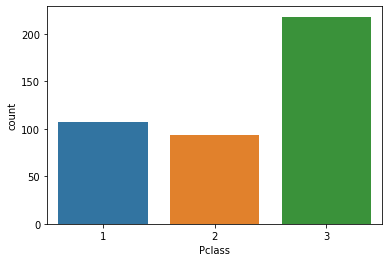

In [52]:
sns.countplot(df['Pclass']).unique()

In [ ]:
#find null values 
df.isnull().sum()

Oh no, we have some null values in the ‘Age’ and ‘Cabin’ variables. But, don’t worry. We will find a way to deal with them soon.

In [55]:
#replace null value

df.replace(np.nan,'0',inplace =True )
#Check the changes now
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method=’pad’, axis=None) 

In [56]:
#knowing the datatypes
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

In [61]:
#filter data
df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,903,0,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0,0,S
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4,0,C
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,0,0,0,PC 17598,31.6833,0,S


their are 107 rows for this conditon

In [65]:
df[df['Pclass']==2].shape

(93, 12)

In [66]:
df[df['Pclass']==3].shape

(218, 12)

In [74]:
df[['Fare']].dtypes

Fare    object
dtype: object

In [76]:
df['Fare'] = pd.to_numeric(df['Fare'])

In [77]:
df[['Fare']].dtypes

Fare    float64
dtype: object

<AxesSubplot:>

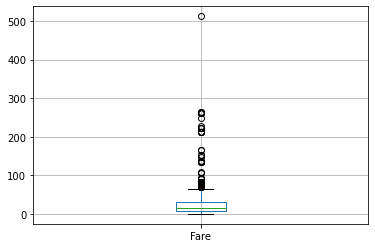

In [82]:
df[['Fare']].boxplot()